# Round 4. Percolation in Erdös-Rényi (ER) networks

Erdös-Rényi networks are random networks where $N$ nodes are randomly connected such that the probability that a pair of nodes is linked is $p$.
In network science, the ER random graphs are important because they provide the simplest reference to which one can compare real-world networks. Many interesting real networks are very large (in number of nodes) and sparse (in a sense that single nodes have very few connections as compared to the network size). 

We will analyse large and sparse ER graphs, where the average degree $\langle k \rangle$ is some fixed (and small) number, and the size of the network $N$ is very large. Theoretically we will be thinking of networks that are infinitely large, but where $\langle k \rangle$ is still fixed (i.e., $N \to \infty$ and $p \to 0$ such that $p(N-1)=\langle k \rangle$ stays constant). In terms of simulations we will use as large networks as is convenient from the computational point of view, with the idea that larger network sizes will give us better results.

In this exercise, we will analyze the percolation properties of ER graphs. We will especially focus on the *percolation threshold* which is the value of $\langle k \rangle$ where the giant connected component appears (when $N$ is increasing, based on definition the giant component exists if the size of largest conneted component ,$S_{\max}$, also grows in proportion to $N$ $S_{\max}$ or in other words $S_{\max}/N \to s_{\max}$ where $s_{\max}>0$).

To get you started, you may use this notebook or the accompanying Python template `percolation_in_er_networks.py` available in MyCourses. The usage of the notebook or template is fully **optional**. Then you only need to fill in the required functions. Some of the functions do NOT need modifications. You may start your solution after the subtitle "**Begin of the Exercise**" down below. 

In addition to returning a short report of your results (including the visualizations), return also your commented Python code or notebook. Remember to label the axes in your figures!

In [6]:
import random
import copy
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Set the drawing parameters to fit the windows
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [7]:
def calculate_loop_edge_fraction(network, visited_nodes, boundary_nodes):
    """ Calculates the number of edges that go from the boundary to already visited nodes
    in addition to the number of edges that is expected if the network would be a tree.
    This number is then divided by the number of edges in total that go from the boundary
    to the visited nodes.

    In the case that the there are zero edges from the boundary to the visited nodes,
    this function returns zero (i.e., in the beginning when the boundary set is the same
    as the visited nodes).
    
    In the case that in breadth-first search all the reachable nodes have been already discovered, this function returns NaN.

    Parameters
    ----------
    network : networkx.Graph object
    visited_nodes : set object
      The set of nodes that are visited (including the boundary)
    boundary_nodes : set object
      The set of nodes that are in the boundary, i.e., the were visited in the last iteration.

    Returns
    -------
    The fraction described above : float or NaN

    """
    if len(visited_nodes) == 1:
        return 0
    
    if len(boundary_nodes) == 0:
        #all the reachable nodes have been visited before
        return(np.nan)
    
    edge_count = 0

    for node in boundary_nodes:
        for neighbor in network[node]:
            if neighbor in visited_nodes or neighbor in boundary_nodes:
                edge_count += 1

    if edge_count != 0:
        loop_count = edge_count -len(boundary_nodes)
        assert loop_count >= 0
        return loop_count/float(edge_count)
    else:
        return 0

# Begin of the exercise
Write your code here to analyse large and sparse ER graphs.

### a. Expected number of nodes at $d$ steps away (pen and paper)
Given the assumption that large and sparse ER graphs are tree-like, use the idea of branching processes and the concept of excess degree (presented in the lectures) to calculate the expected number of nodes at $d$ steps away, $n_d$, from a randomly selected node in an ER network as a function of $\langle k \rangle$ and $d$. Using this result, justify that in large and sparse ER networks, the giant component appears when $\langle k \rangle > 1$.

**Hints:**
- Remember that the degree distribution of an ER network is a Poisson distribution when $N \rightarrow \infty$ such that $\langle k \rangle$ is constant. A property of Poisson distribution is that the mean and the variance are equal.

### b. Expected number of nodes at $d$ steps away (numerical simulation)
Verify your analytical calculations for $n_d$ using numerical simulations. Calculate the $n_d$ value for $d \in \{0 \dots 15\} $, $\langle k \rangle \in \{ 0.5, 1, 2\} $, and starting from enough randomly selected nodes to get a good estimate for the expected value. Try out two network sizes: $N=10^4$ and $N=10^5$ to see how the size affects the calculations. For this and the following tasks, you can use the Python template `percolation_in_er_networks.py`

### c. Tree-likeness assumption validity range
Explore the range at which the assumption of tree-likeness of the network is valid. This can be done, for example, by calculating the number of edges that nodes at depth $d$ have that go back to some earlier level in addition to the single edge that connects each node to the level $d-1$, and reporting the average fraction of such edges to all edges that go from depth $d$ to earlier levels/depths. In a perfect tree this fraction is exactly 0. Comment on the results, and their effect on our results to exercise b). What are the other things that make your analytical calculation of $n_d$ to differ from your simulation results?

In [8]:
def create_er_network(net_size, avg_degree):
    """Creates a realisation of an Erdos-Renyi network.

    Parameters
    ----------
    net_size : int
       Number of nodes in the network.
    avg_degree : float
       The value of edge probability p is set such that this is the
       expected average degree in the network.

    Returns
    -------

    net: a network object

    """
    #TODO: Implement this function.
    p = avg_degree / (net_size - 1) # Replace!
    net = nx.fast_gnp_random_graph(net_size,p) # Replace !
    # Use the fast function fast_gnp_random_graph to create the ER graph!
    # YOUR CODE HERE
    #raise NotImplementedError()
    return net
    


In [9]:
def expand_breadth_first_search(network, visited_nodes, boundary_nodes):
    """Performs one step in a breadth first search and updates the visited nodes
    and boundary nodes sets that are given as parameters accordingly. Here one
    step means that we will find all nodes that are one step further away from
    the starting node. These nodes will form the new boundary.

    Parameters
    ----------
    network : networkx.Graph object
    visited_nodes : set object
      The set of nodes that are visited (including the boundary)
    boundary_nodes : set object
      The set of nodes that are in the boundary, i.e., the were visited in the last iteration.

    Returns
    -------
    Nothing, the visited nodes an boundary nodes are update in place.

    """

    new_boundary = set() # Nodes in the new boundary are added here
    for node in boundary_nodes:
        for nei in network.neighbors(node):
            if nei not in visited_nodes:
                visited_nodes.add(nei)
                new_boundary.add(nei)

    # Go through all the nodes in the boundary, and add their neighbors
    # that are not visited to the new boundary. Remember to update
    # the visited_nodes as you go.
    # YOUR CODE HERE
    #raise NotImplementedError()

    # Here we replace the old boundary with the new boundary
    boundary_nodes.clear()
    boundary_nodes.update(new_boundary)

    # We return nothing as the results were updated to visited_nodes and boundary_nodes


In [10]:
def ER_breadth_first_search(avg_degree, net_size, number_of_samples,
                            max_depth=15, show_netsize=False):
    """Creates a figure of breadth first search in an ER network.

    Parameters
    ----------
    avg_degree : float
      The expected degree of the nodes in the ER network
    net_size : int
      The number of nodes in the ER network
    number_of_samples : int
       The number of randomly selected starting node for the BFS
    max_depth : int
       The maximum depth of the BFS
    show_netsize : bool
       If True, we will plot the size of the network in the first panel as a dotter horizontal line.

    Returns
    -------
    fig : figure object
    """
    net = create_er_network(net_size, avg_degree)

    # We will count the number of nodes and the loop fraction for each depth and each
    # starting node. That is, we need a 2-dimensional list to save these results.
    # The element node_count[depth][sample_number] gives the number of nodes at the boundary
    # of the BFS at the given depth for given sample number.
    # The code below will create lists of length max_depth where each element is an empty list.
    node_count = [[] for depth in range(max_depth+1)]
    loop_edge_fraction = [[] for depth in range(max_depth+1)]

    # Next we will run the BFS until max_depth for each randomly selected sample
    for _sample_nr in range(number_of_samples):
        # Choose random starting node:
        start_node = random.randint(0, net_size-1)
        # In the beginning we have only visited the start node:
        visited_nodes = set([start_node])
        # The start node is also the only boundary node, see expand_breadth_first_search:
        boundary_nodes = set([start_node])

        for depth in range(max_depth+1):
            number_of_boundary_nodes = len(boundary_nodes) #replace
            # YOUR CODE HERE
            #raise NotImplementedError()

            fraction_of_loop_edges = calculate_loop_edge_fraction(net,
                                                                  visited_nodes, boundary_nodes)

            # Update the visited nodes and the boundary
            expand_breadth_first_search(net, visited_nodes, boundary_nodes)

            # Saving the results
            node_count[depth].append(number_of_boundary_nodes)
            loop_edge_fraction[depth].append(fraction_of_loop_edges)

    # Averaging over the different starting nodes.
    #when calculating average of loop_edge_fraction we use np.nanmean function because we have defined fraction_of_loop_edges to return nan if all the reachable nodes are already visited
    #avg_node_count = list(map(np.mean, node_count))
    avg_node_count = list(map(np.mean, node_count))
    avg_loop_edge_fraction = list(map(np.nanmean, loop_edge_fraction))
    
    

    # Calculating the theoretical values, assuming the network is a tree
    avg_node_count_theoretical = []
    for depth in range(max_depth+1):
        n = avg_degree ** depth # Replace with the formula from a)
        # YOUR CODE HERE
        #raise NotImplementedError()
        avg_node_count_theoretical.append(n)

    #Plotting the results
    fig = plt.figure(figsize=(4, 8))
    ax1 = fig.add_subplot(211)

    ax1.semilogy(list(range(max_depth+1)), avg_node_count, "x", label="Simulation")
    ax1.semilogy(list(range(max_depth+1)), avg_node_count_theoretical, label="Theoretical")

    if show_netsize:
        ax1.semilogy([0, max_depth], 2*[net_size], "k--")

    ax1.set_xlabel("Depth") # Set proper axis labels!
    ax1.set_ylabel("Avg_node_count") # Set proper axis labels!
    # YOUR CODE HERE
    #raise NotImplementedError()
    ax1.set_xlim(0, max_depth)
    ax1.legend()


    ax2 = fig.add_subplot(212)
    ax2.plot(list(range(max_depth+1)), avg_loop_edge_fraction, "x", label="Simulation")
    ax2.set_xlabel("Depth") # Set proper axis labels!
    ax2.set_ylabel("Avg_node_count") # Set proper axis labels!
    # YOUR CODE HERE
    #raise NotImplementedError()
    ax2.set_xlim(0, max_depth)
    ax2.set_ylim(0, 1)

    # plt.show() # uncomment if you want to display the figure on the screen

    return fig


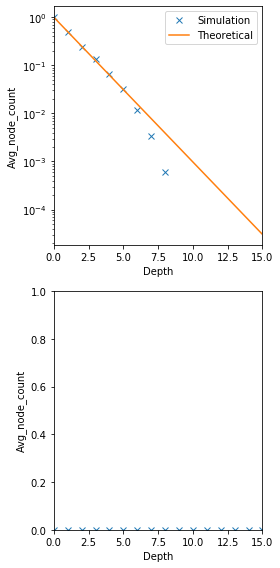

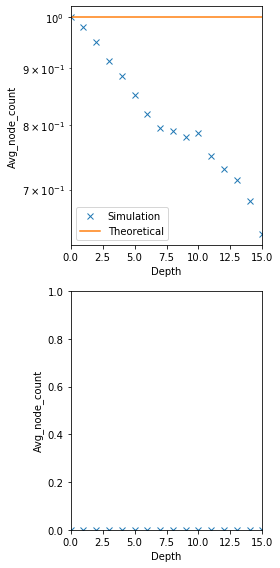

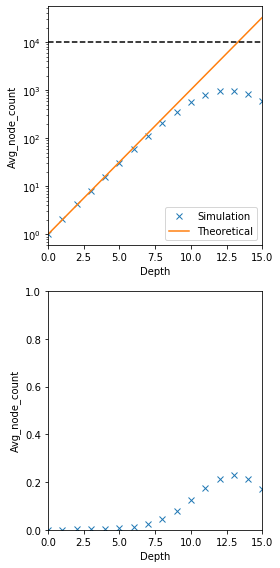

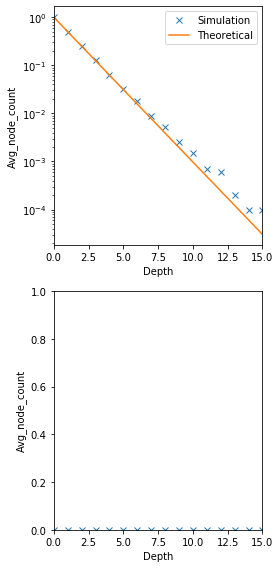

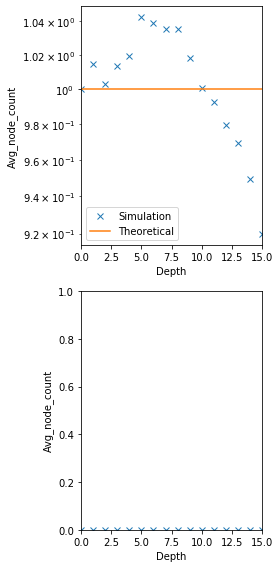

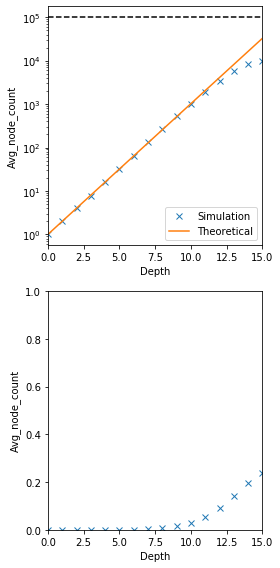

In [11]:
fig = ER_breadth_first_search(0.5, 10**4, 10000)
fig.savefig('./er_breadthfirst_05_10k.pdf')

fig = ER_breadth_first_search(1, 10**4, 10000)
fig.savefig('./er_breadthfirst_1_10k.pdf')

fig = ER_breadth_first_search(2, 10**4, 100, show_netsize=True, max_depth=15)
fig.savefig('./er_breadthfirst_2_10k.pdf')

fig = ER_breadth_first_search(0.5, 10**5, 10000)
fig.savefig('./er_breadthfirst_05_100k.pdf')

fig = ER_breadth_first_search(1, 10**5, 10000)
fig.savefig('./er_breadthfirst_1_100k.pdf')

fig = ER_breadth_first_search(2, 10**5, 100, show_netsize=True, max_depth=15)
fig.savefig('./er_breadthfirst_2_100k.pdf')

### d. Percolation theshold of ER networks
Calculate the component sizes of simulated ER networks, and use this data to (loosely) verify that the percolation threshold of ER networks is at the average degree of $\langle k \rangle=1$.
That is, for $\langle k \rangle < 1$ the largest connected component is small (size being measured as number of participating nodes), and for $\langle k \rangle > 1$ it quickly reaches the network size.

Do this by generating ER networks of size $N=10^4$ with different average degrees: $\langle k \rangle=\left[0.00, 0.05, ..., 2.45, 2.50\right]$.
For each of the ER networks, compute the size of the largest component and plot it against $\langle k \rangle$.

### e. Susceptibility
Another, a more elegant, way to find out when the percolation transition happens is to try to find the point at which the possibility for the largest component size growth is the largest when the control parameter (here $\langle k \rangle$ or $p$) is changed very little. Think about the situation where $\langle k \rangle$ is changed so slightly that a single link is added between the largest component and a randomly selected node that is not in the largest component. The expected change in the largest component size in this situation is some times called susceptibility, and it should get very large values at the percolation transition point. The susceptibility depends on the size distribution of all the other components, and it can be calculated with the following formula:
\begin{equation}
\chi = \frac{\sum_s s^2 C(s) - s_{max}^2}{\sum_s s C(s) - s_{max}} \,,
\end{equation}
where $C(s)$ is the number of components with $s$ nodes. Calculate the susceptibility $\chi$ for each network generated in exercise d), and again plot $\chi$ as a function of $\langle k \rangle$. Explain the shape of the curve, and its implications. 

In [12]:
def get_susceptibility(component_size_distribution):
    """Calculates the susceptibility (as defined in ex. 4.1e)

    Parameters
    ----------
    component_size_distribution : dict
       The component size distribution. See the function get_component_size_dist

    Returns
    -------
    Susceptibility value : float
    """
    numerator = 0 # Numerator value of the formula to be updated
    denominator = 0 # Denominator value of the formula to be updated
    #TODO: Implement this function
    for i in component_size_distribution:
        numerator += component_size_distribution[i] * (i ** 2)
        denominator += component_size_distribution[i] * i
    numerator -= (get_largest_component_size(component_size_distribution) ** 2)
    denominator -= get_largest_component_size(component_size_distribution)
    # YOUR CODE HERE
    #raise NotImplementedError()
    return numerator/denominator

In [13]:
def get_largest_component_size(component_size_distribution):
    """Finds the largest component in the given component size distribution.

    Parameters
    ----------
    component_size_distribution : dict
       The component size distribution. See the function get_component_size_dist

    Returns
    -------
    The largest component size : int
    """
    return max(component_size_distribution.keys())
    #TODO: Implement this function.
    # YOUR CODE HERE
    #raise NotImplementedError()

In [14]:
def get_component_size_dist(net):
    """Calculates the (unnormalised) component size distribution of a network.

    For example, if the input network has 1 component of size 5 nodes and
    3 components of size 10 nodes, then this function will return a dictionary:
    {5:1, 10:3}.

    Parameters
    ----------
    net : networkx.Graph object

    Returns
    -------
    Dictionary where keys are component sizes and values are the number of
    components of that size.
    """
    dist = {}
    for c in nx.connected_components(net):
        if(len(c)) not in dist:
            dist[len(c)] = 1
        else:
            dist[len(c)] += 1
    # Hint: use the function nx.connected_components
    #TODO: Implement this function.
    # YOUR CODE HERE
    #raise NotImplementedError()
    return dist

In [15]:
def ER_percolation(N, maxk, stepsize=0.1):
    """Builds ER networks with average degrees from 0 to maxk and
       plots the size of the largest connected component and susceptibility
       as a function of the average degree.

    Parameters
    ----------
    N : int
      Number of nodes in the ER network
    maxk : float
      The maximum average degree
    stepsize : float
      The size of the step after which the LCC and susceptibility is calculated.
      I.e., they are plotted at 0, stepsize, 2*stepsize, ..., maxk

    Returns
    -------
    fig : figure handle
    """

    klist = np.arange(0.0, maxk, stepsize)
    giantsize = []
    smallsize = []

    # Loop over the avg degree range
    for k in klist:
        print("Doing the calculations for avg degree:")
        print(k)

        # Generate an ER network with N nodes and avg degree k
        net = create_er_network(N, k)

        # Get the distribution of component sizes
        component_size_dist = get_component_size_dist(net)

        # Galculate the largest component size
        giantsize.append(get_largest_component_size(component_size_dist))

        # Calculate the avg component size for the other components
        smallsize.append(get_susceptibility(component_size_dist))

    # plot the numbers
    fig = plt.figure()
    ax = fig.add_subplot(2, 1, 1)

    ax.plot(klist, giantsize, 'r-')
    ax.set_xlabel('average degree') # TODO: label the axis!
    ax.set_ylabel('size of the LCC') # TODO: label the axis!
    # YOUR CODE HERE
    #raise NotImplementedError()

    ax2 = fig.add_subplot(2, 1, 2)
    ax2.plot(klist, smallsize, 'k-')
    ax2.set_xlabel('average degree')  # TODO: label the axis!
    ax2.set_ylabel('susceptibility')  # TODO: label the axis!
    # YOUR CODE HERE
    #raise NotImplementedError()

    fig.suptitle('Number of nodes = ' + str(N))
    # plt.show() # uncomment if you want to display the figure on the screen

    return fig


Doing the calculations for avg degree:
0.0
Doing the calculations for avg degree:
0.05
Doing the calculations for avg degree:
0.1
Doing the calculations for avg degree:
0.15000000000000002
Doing the calculations for avg degree:
0.2
Doing the calculations for avg degree:
0.25
Doing the calculations for avg degree:
0.30000000000000004
Doing the calculations for avg degree:
0.35000000000000003
Doing the calculations for avg degree:
0.4
Doing the calculations for avg degree:
0.45
Doing the calculations for avg degree:
0.5
Doing the calculations for avg degree:
0.55
Doing the calculations for avg degree:
0.6000000000000001
Doing the calculations for avg degree:
0.65
Doing the calculations for avg degree:
0.7000000000000001
Doing the calculations for avg degree:
0.75
Doing the calculations for avg degree:
0.8
Doing the calculations for avg degree:
0.8500000000000001
Doing the calculations for avg degree:
0.9
Doing the calculations for avg degree:
0.9500000000000001
Doing the calculations for

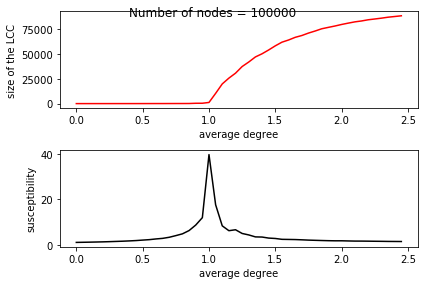

In [16]:
fig = ER_percolation(10**5, 2.5, 0.05)
fig.savefig('./er_percolation.pdf')